<a href="https://colab.research.google.com/github/herb1110406/0315/blob/main/coworker_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

233
frame Deltatime: 64140


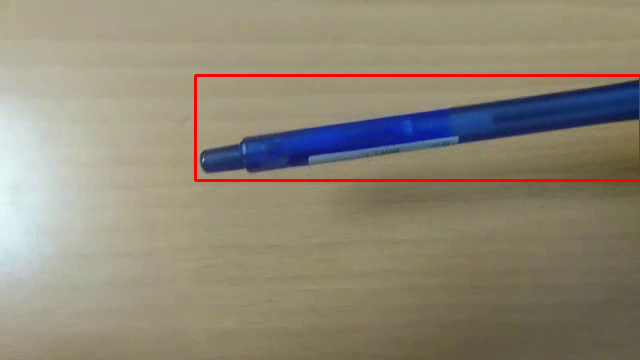

KeyboardInterrupt: ignored

In [1]:
import cv2
import numpy as np
import IPython.display as dp
import time
from datetime import timedelta 
from datetime import datetime
from google.colab.patches import cv2_imshow

video_cap=cv2.VideoCapture("h3.mp4")
interval = 1
frame_count = 0
frame_index = 0
if video_cap.isOpened():
  success = True
else :
  success = False
  print("open fail")
stop = False
start = 0
end = 700
timeInterval = 60000
lastFrame = datetime.now()
while(success and not stop):
  success, frame = video_cap.read()
  if success is False:
    break

  if frame_index % interval == 0:
    if(frame_index >= start and frame_index < end):
      m4 = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
      m5 = cv2.cvtColor(m4,cv2.COLOR_BGR2GRAY)
      m3 = m5.copy()
      ret,thresh1 = cv2.threshold(m5,128,255,cv2.THRESH_BINARY)
      m3 = cv2.cvtColor(m3,cv2.COLOR_GRAY2BGR)
      thresh1 = cv2.dilate(thresh1,np.ones((20,20)))
      m2 = np.full((thresh1.shape[0],thresh1.shape[1],3),255,np.uint8)
      a, b =cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
      for i in range(0,len(a),1):
        #cv2.drawContours(m3,a, i,(0,0,255),2)
        x, y, w, h = cv2.boundingRect(a[i])
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,0,255),2)
    frame_count += 1
    if(frame_count>=end):
      stop = True
  dp.clear_output(True)
  print(frame_index)
  nowFrame = datetime.now()
  print('frame Deltatime:',(nowFrame-lastFrame).microseconds)
  lastFrame = nowFrame
  cv2_imshow(frame)
  time.sleep(1)
  frame_index += 1
  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')